In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor, DMatrix, plot_importance
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

# Search for optimal parameters

In [2]:
# Set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

In [3]:
# Read data
data_path = r'D:\Desktop\Researchs\CRSS of Ti\Training data\Training data (Filled 1 column).xlsx'
df = pd.read_excel(data_path)

In [4]:
# Filter out rows where the labels has missing values
df = df.dropna(subset=[df.columns[1]])

In [5]:
# Convert categorical column to dummy variables
df = pd.get_dummies(df, columns=[df.columns[6]])
df

,B<a>,P<a>,п1<a>,п1<c+a>,T1,C1,d,T,έ,`Md,`Bo,e/a̅,Δr̅,C,O,H,~Al,~Mo,M_C,M_T
0,209.000000,181.0,NaN,474.0,NaN,NaN,NaN,300.0,0.00025,2.447,2.790,4.00,0.0000,0.012,0.070,0.0150,0.406,0.056,True,False
2,230.900131,139.1,NaN,NaN,NaN,NaN,2.80,300.0,0.03000,2.447,2.790,4.00,0.0000,0.080,0.150,0.0150,0.870,0.032,True,False
3,234.993423,174.7,NaN,NaN,NaN,NaN,1.95,300.0,0.00500,2.447,2.790,4.00,0.0000,0.080,0.150,0.0150,0.870,0.032,True,False
4,234.424667,220.1,NaN,NaN,NaN,NaN,0.97,300.0,0.00500,2.447,2.790,4.00,0.0000,0.080,0.150,0.0150,0.870,0.032,True,False
5,234.424667,239.8,NaN,NaN,NaN,NaN,0.98,300.0,0.00500,2.447,2.790,4.00,0.0000,0.080,0.150,0.0150,0.870,0.032,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,329.900000,277.2,1167.0,NaN,NaN,NaN,4.21,300.0,0.00050,2.422,2.755,3.91,-0.0054,0.050,0.100,0.0125,7.212,4.870,False,True
139,206.000000,190.0,NaN,619.0,NaN,NaN,NaN,300.0,0.00500,2.423,2.761,3.92,-0.0065,0.005,0.100,0.0010,6.713,3.247,False,True
140,392.000000,329.0,NaN,874.0,NaN,NaN,20.00,293.0,0.00100,2.414,2.754,3.92,-0.0087,0.080,0.015,0.0120,7.006,4.560,False,True
141,275.800000,206.9,248.2,NaN,NaN,NaN,NaN,300.0,0.00025,2.407,2.743,3.89,-0.0112,0.023,0.140,0.0013,8.712,2.200,False,True


In [6]:
X = df.iloc[:, 6:]
y = df.iloc[:,1]

In [7]:
# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [8]:
# Define Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalized data
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=random_seed))
])

In [9]:
# Define parameter space
param_space = {
    'xgb__learning_rate': (0.01, 0.3, 'log-uniform'),
    'xgb__n_estimators': (50, 300),
    'xgb__max_depth': (2, 8),
    'xgb__min_child_weight': (1, 10),
    'xgb__subsample': (0.5, 1.0, 'uniform'),
    'xgb__colsample_bytree': (0.5, 1.0, 'uniform'),
    'xgb__gamma': (0, 5),
    'xgb__reg_alpha': (0, 1),
    'xgb__reg_lambda': (0, 1)
}

In [10]:
# Parametric search using BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=param_space,
    scoring='neg_mean_squared_error',
    cv=KFold(n_splits=5, shuffle=True, random_state=random_seed), 
    n_iter=50,
    n_jobs=-1,
    random_state=random_seed
)

# Fit model
bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('xgb',
                                         XGBRegressor(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      g...
              n_jobs=-1, random_state=42, scoring='neg_mean_squared_error',
              search_spaces={'xgb__colsample_bytree': (0.5, 1.0, 'uniform'),
                             'xgb__gamma': (0, 5),
                             'xgb__learning_rate': (0.01, 0.3, 'log-uniform'),
                             'xgb__max_depth': (2, 8),
                             'xgb__min_child_weight': (1, 10),
                             'xgb__n_estimators': (50, 300),
                             'xgb__reg_alpha': (0, 1),
                             'xgb__reg_lambda': (0, 1),
                             'xgb__subsample': (0.5, 1.0, 'uniform')})

In [11]:
# Output the best parameters
print("Best params:", bayes_search.best_params_)
print("Best score of train:", bayes_search.best_score_)
print("Best score of test (R²):", r2_score(y_test, bayes_search.predict(X_test)))

Best params: OrderedDict([('xgb__colsample_bytree', 0.5399579505142688), ('xgb__gamma', 0), ('xgb__learning_rate', 0.011772216006758627), ('xgb__max_depth', 8), ('xgb__min_child_weight', 1), ('xgb__n_estimators', 298), ('xgb__reg_alpha', 0), ('xgb__reg_lambda', 1), ('xgb__subsample', 1.0)])
Best score of train: -4385.102400324575
Best score of test (R²): 0.888550052307447


# Build the model

In [12]:
# Get the best parameters for further modeling
best_params = bayes_search.best_params_
xgb_best_params = {k.split('__')[1]: v for k, v in best_params.items()}

In [13]:
# Convert data to DMatrix format for XGBoost training
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [14]:
# Train XGBoost model using the best parameters
num_round = 500
xgb_model = xgb.train(xgb_best_params, dtrain, num_round, evals=[(dtest, 'eval')], verbose_eval=False)

C:\Users\25111\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [16:49:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [15]:
# Save the model to a file
filename = 'xgboost_model_Pa_0926(original).sav'
pickle.dump(xgb_model, open(filename, 'wb'))

# Predicted results using the original data

In [16]:
# Predict on the test set
y_pred = xgb_model.predict(dtest)

In [17]:
# Calculate and print the RMSE and R² on the test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'Test RMSE: {rmse}')
print(f'R² score: {r2}')

Test RMSE: 41.628962757057316
R² score: 0.883131983620518


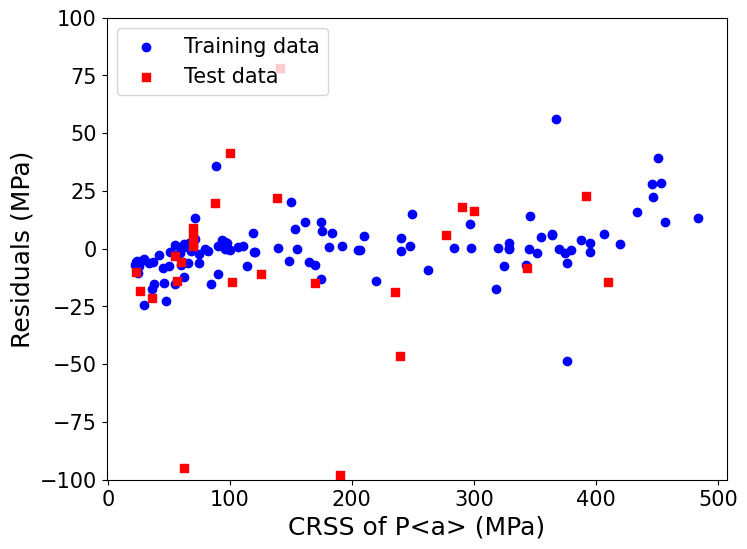

In [18]:
# Obtain residuals for training and test sets
y_pred_train = xgb_model.predict(dtrain)
residuals_train = y_train.values - y_pred_train
residuals_test = y_test.values - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.ylim(-100, 100)
plt.scatter(x=y_train, y=residuals_train, c='blue', marker='o', label='Training data')
plt.scatter(x=y_test, y=residuals_test, c='red', marker='s', label='Test data')
plt.xlabel('CRSS of P<a> (MPa)', fontsize=18)
plt.ylabel('Residuals (MPa)', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.savefig(r'D:\Desktop\Researchs\CRSS of Ti\Training results\Residual plot of original Pa.png', dpi=300, bbox_inches='tight')
plt.show()

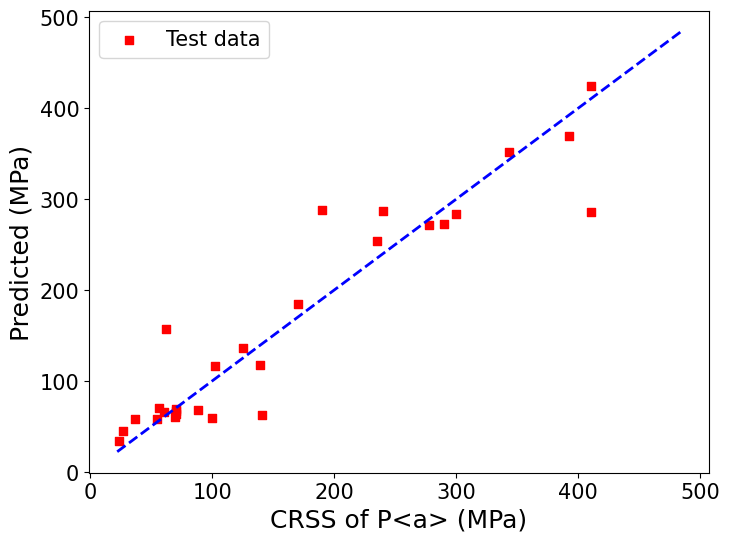

In [19]:
# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='red', marker='s', label='Test data')
plt.xlabel('CRSS of P<a> (MPa)', fontsize=18)
plt.ylabel('Predicted (MPa)', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='blue', lw=2, linestyle='--')
plt.savefig(r'D:\Desktop\Researchs\CRSS of Ti\Training results\Predicted vs Actual of original Pa.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
# Perform cross-validation and obtain performance metrics
cv_result = xgb.cv(xgb_best_params, dtrain, num_round, nfold=5)

C:\Users\25111\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [16:49:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


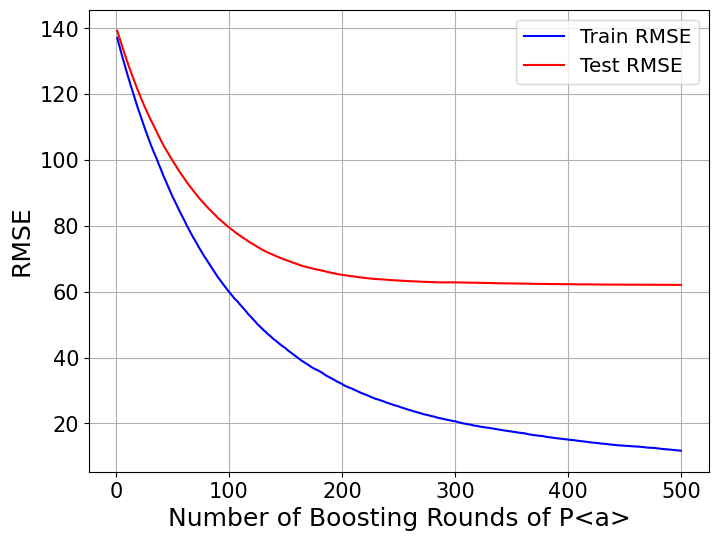

In [21]:
# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_result) + 1), cv_result['train-rmse-mean'], c="blue", label='Train RMSE')
plt.plot(range(1, len(cv_result) + 1), cv_result['test-rmse-mean'], c="red", label='Test RMSE')
plt.xlabel('Number of Boosting Rounds of P<a>', fontsize=18)
plt.ylabel('RMSE', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize="x-large")
plt.savefig(r'D:\Desktop\Researchs\CRSS of Ti\Training results\XGBoost Learning Curve of original Pa.png', dpi=300, bbox_inches='tight')
plt.show()

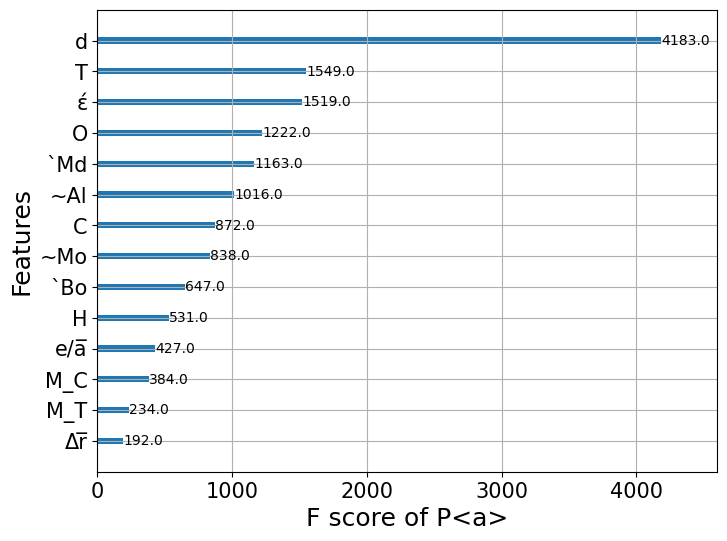

In [22]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(8, 6))
plot_importance(xgb_model, ax=ax)
plt.xlabel('F score of P<a>', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('')
plt.savefig(r'D:\Desktop\Researchs\CRSS of Ti\Training results\Feature importance of original Pa.png', dpi=300, bbox_inches='tight')
plt.show()

# Fill in empty data using the initial model

In [23]:
# Load the saved model for prediction
model_filename = 'xgboost_model_Pa_0926(original).sav'
xgb_model = joblib.load(model_filename)

In [24]:
# Read the Excel file with missing labels
df_missing = pd.read_excel(data_path)

In [25]:
# Identify rows with missing labels in the B<a> column
missing_mask = df_missing[df_missing.columns[1]].isna()

In [26]:
# Filter rows with missing labels
df_to_predict = df_missing[missing_mask]
df_to_predict

,B<a>,P<a>,п1<a>,п1<c+a>,T1,C1,M,d,T,έ,`Md,`Bo,e/a̅,Δr̅,C,O,H,~Al,~Mo
1,238.396133,NaN,NaN,607.5,NaN,NaN,C,NaN,300.0,0.0001,2.447,2.790,4.00,0.0000,0.080,0.18,0.0150,1.044,0.032
42,190.633301,NaN,NaN,NaN,NaN,370.0,C,25.0,300.0,0.0010,2.447,2.790,4.00,0.0000,0.016,0.06,0.0016,0.348,0.100
43,182.240936,NaN,NaN,NaN,NaN,390.0,C,25.0,300.0,6000.0000,2.447,2.790,4.00,0.0000,0.016,0.06,0.0016,0.348,0.100
129,380.000000,NaN,NaN,NaN,NaN,NaN,T,NaN,300.0,NaN,2.412,2.761,3.95,-0.0057,0.040,0.12,0.0125,7.096,8.800


In [27]:
# One-hot encoding for non-numeric feature in df_to_predict
df_to_predict = pd.get_dummies(df_to_predict, columns=[df_to_predict.columns[6]])
df_to_predict

,B<a>,P<a>,п1<a>,п1<c+a>,T1,C1,d,T,έ,`Md,`Bo,e/a̅,Δr̅,C,O,H,~Al,~Mo,M_C,M_T
1,238.396133,NaN,NaN,607.5,NaN,NaN,NaN,300.0,0.0001,2.447,2.790,4.00,0.0000,0.080,0.18,0.0150,1.044,0.032,True,False
42,190.633301,NaN,NaN,NaN,NaN,370.0,25.0,300.0,0.0010,2.447,2.790,4.00,0.0000,0.016,0.06,0.0016,0.348,0.100,True,False
43,182.240936,NaN,NaN,NaN,NaN,390.0,25.0,300.0,6000.0000,2.447,2.790,4.00,0.0000,0.016,0.06,0.0016,0.348,0.100,True,False
129,380.000000,NaN,NaN,NaN,NaN,NaN,NaN,300.0,NaN,2.412,2.761,3.95,-0.0057,0.040,0.12,0.0125,7.096,8.800,False,True


In [28]:
# Align the columns of the filled data (df_train) and data to predict (df_to_predict)
df, df_to_predict = df.align(df_to_predict, join='left', axis=1, fill_value=0)

In [29]:
# Extract features for prediction, excluding the label column
X_to_predict = df_to_predict.iloc[:, 6:].to_numpy()

In [30]:
# Ensure the feature order matches the trained model
feature_names = df.columns[6:].tolist()

In [31]:
# Make predictions using the model
d_matrix = xgb.DMatrix(X_to_predict, feature_names=feature_names)
y_pred = xgb_model.predict(d_matrix)

In [32]:
# Fill the missing labels with the predicted values
df_missing.loc[missing_mask, df_missing.columns[1]] = y_pred

In [33]:
# Save the dataframe with filled labels back to the Excel file
output_file = r'D:\Desktop\Researchs\CRSS of Ti\Training data\Training data (Filled 2 columns).xlsx'
df_missing.to_excel(output_file, index=False)

# Rebulid model using secondary data

In [34]:
# Read data again
data_path = r'D:\Desktop\Researchs\CRSS of Ti\Training data\Training data (Filled 2 columns).xlsx'
df = pd.read_excel(data_path)

In [35]:
# Convert categorical column to dummy variables
df = pd.get_dummies(df, columns=[df.columns[6]])
df

,B<a>,P<a>,п1<a>,п1<c+a>,T1,C1,d,T,έ,`Md,`Bo,e/a̅,Δr̅,C,O,H,~Al,~Mo,M_C,M_T
0,209.000000,181.000000,NaN,474.0,NaN,NaN,NaN,300.0,0.00025,2.447,2.790,4.00,0.0000,0.012,0.070,0.0150,0.406,0.056,True,False
1,238.396133,103.283859,NaN,607.5,NaN,NaN,NaN,300.0,0.00010,2.447,2.790,4.00,0.0000,0.080,0.180,0.0150,1.044,0.032,True,False
2,230.900131,139.100000,NaN,NaN,NaN,NaN,2.80,300.0,0.03000,2.447,2.790,4.00,0.0000,0.080,0.150,0.0150,0.870,0.032,True,False
3,234.993423,174.700000,NaN,NaN,NaN,NaN,1.95,300.0,0.00500,2.447,2.790,4.00,0.0000,0.080,0.150,0.0150,0.870,0.032,True,False
4,234.424667,220.100000,NaN,NaN,NaN,NaN,0.97,300.0,0.00500,2.447,2.790,4.00,0.0000,0.080,0.150,0.0150,0.870,0.032,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,329.900000,277.200000,1167.0,NaN,NaN,NaN,4.21,300.0,0.00050,2.422,2.755,3.91,-0.0054,0.050,0.100,0.0125,7.212,4.870,False,True
139,206.000000,190.000000,NaN,619.0,NaN,NaN,NaN,300.0,0.00500,2.423,2.761,3.92,-0.0065,0.005,0.100,0.0010,6.713,3.247,False,True
140,392.000000,329.000000,NaN,874.0,NaN,NaN,20.00,293.0,0.00100,2.414,2.754,3.92,-0.0087,0.080,0.015,0.0120,7.006,4.560,False,True
141,275.800000,206.900000,248.2,NaN,NaN,NaN,NaN,300.0,0.00025,2.407,2.743,3.89,-0.0112,0.023,0.140,0.0013,8.712,2.200,False,True


In [36]:
X = df.iloc[:, 6:]
y = df.iloc[:,1]

In [37]:
# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [38]:
# Define Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalized data
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=random_seed))
])

In [39]:
# Define parameter space
param_space = {
    'xgb__learning_rate': (0.01, 0.3, 'log-uniform'),
    'xgb__n_estimators': (50, 300),
    'xgb__max_depth': (2, 8),
    'xgb__min_child_weight': (1, 10),
    'xgb__subsample': (0.5, 1.0, 'uniform'),
    'xgb__colsample_bytree': (0.5, 1.0, 'uniform'),
    'xgb__gamma': (0, 5),
    'xgb__reg_alpha': (0, 1),
    'xgb__reg_lambda': (0, 1)
}

In [40]:
# Parametric search using BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=param_space,
    scoring='neg_mean_squared_error',
    cv=KFold(n_splits=5, shuffle=True, random_state=random_seed), 
    n_iter=50,
    n_jobs=-1,
    random_state=random_seed
)

# Fit model
bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('xgb',
                                         XGBRegressor(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      g...
              n_jobs=-1, random_state=42, scoring='neg_mean_squared_error',
              search_spaces={'xgb__colsample_bytree': (0.5, 1.0, 'uniform'),
                             'xgb__gamma': (0, 5),
                             'xgb__learning_rate': (0.01, 0.3, 'log-uniform'),
                             'xgb__max_depth': (2, 8),
                             'xgb__min_child_weight': (1, 10),
                             'xgb__n_estimators': (50, 300),
                             'xgb__reg_alpha': (0, 1),
                             'xgb__reg_lambda': (0, 1),
                             'xgb__subsample': (0.5, 1.0, 'uniform')})

In [41]:
# Output the best parameters
print("Best params:", bayes_search.best_params_)
print("Best score of train:", bayes_search.best_score_)
print("Best score of test (R²):", r2_score(y_test, bayes_search.predict(X_test)))

Best params: OrderedDict([('xgb__colsample_bytree', 0.7928044389972466), ('xgb__gamma', 4), ('xgb__learning_rate', 0.03551831684854883), ('xgb__max_depth', 6), ('xgb__min_child_weight', 1), ('xgb__n_estimators', 300), ('xgb__reg_alpha', 1), ('xgb__reg_lambda', 1), ('xgb__subsample', 0.5)])
Best score of train: -2086.9408568626795
Best score of test (R²): 0.5863248848190425


In [42]:
# Get the best parameters for further modeling
best_params = bayes_search.best_params_
xgb_best_params = {k.split('__')[1]: v for k, v in best_params.items()}

In [43]:
# Convert data to DMatrix format for XGBoost training
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [44]:
# Train XGBoost model using the best parameters
num_round = 500
xgb_model = xgb.train(xgb_best_params, dtrain, num_round, evals=[(dtest, 'eval')], verbose_eval=False)

C:\Users\25111\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [16:51:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [45]:
# Save the model to another file
filename = 'xgboost_model_Pa_0926(secondary).sav'
pickle.dump(xgb_model, open(filename, 'wb'))

In [46]:
# Predict on the test set
y_pred = xgb_model.predict(dtest)

In [47]:
# Calculate and print the RMSE and R² on the test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'Test RMSE: {rmse}')
print(f'R² score: {r2}')

Test RMSE: 93.05351544740527
R² score: 0.6199764258993044


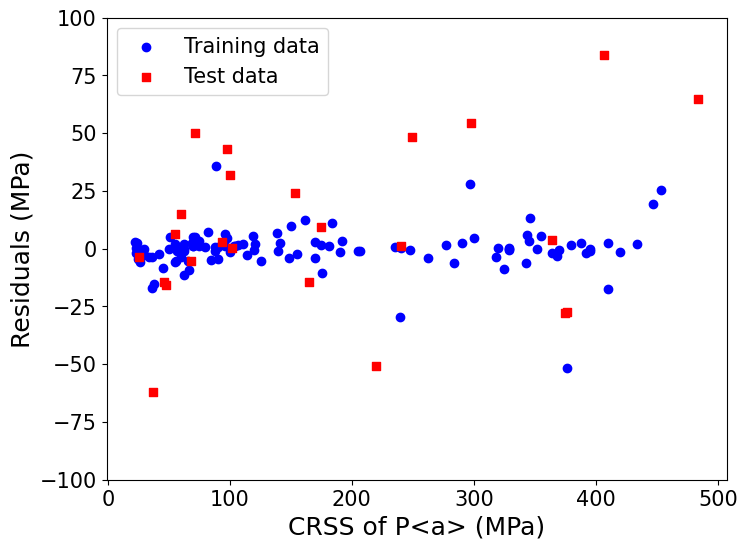

In [48]:
# Obtain residuals for training and test sets
y_pred_train = xgb_model.predict(dtrain)
residuals_train = y_train.values - y_pred_train
residuals_test = y_test.values - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.ylim(-100, 100)
plt.scatter(x=y_train, y=residuals_train, c='blue', marker='o', label='Training data')
plt.scatter(x=y_test, y=residuals_test, c='red', marker='s', label='Test data')
plt.xlabel('CRSS of P<a> (MPa)', fontsize=18)
plt.ylabel('Residuals (MPa)', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.savefig(r'D:\Desktop\Researchs\CRSS of Ti\Training results\Residual plot of secondary Pa.png', dpi=300, bbox_inches='tight')
plt.show()

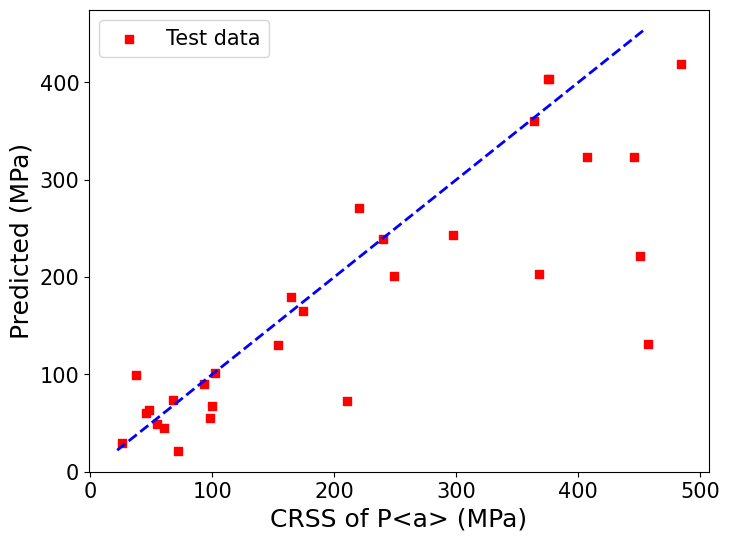

In [49]:
# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='red', marker='s', label='Test data')
plt.xlabel('CRSS of P<a> (MPa)', fontsize=18)
plt.ylabel('Predicted (MPa)', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='blue', lw=2, linestyle='--')
plt.savefig(r'D:\Desktop\Researchs\CRSS of Ti\Training results\Predicted vs Actual of secondary Pa.png', dpi=300, bbox_inches='tight')
plt.show()

In [50]:
# Perform cross-validation and obtain performance metrics
cv_result = xgb.cv(xgb_best_params, dtrain, num_round, nfold=5)

C:\Users\25111\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [16:51:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


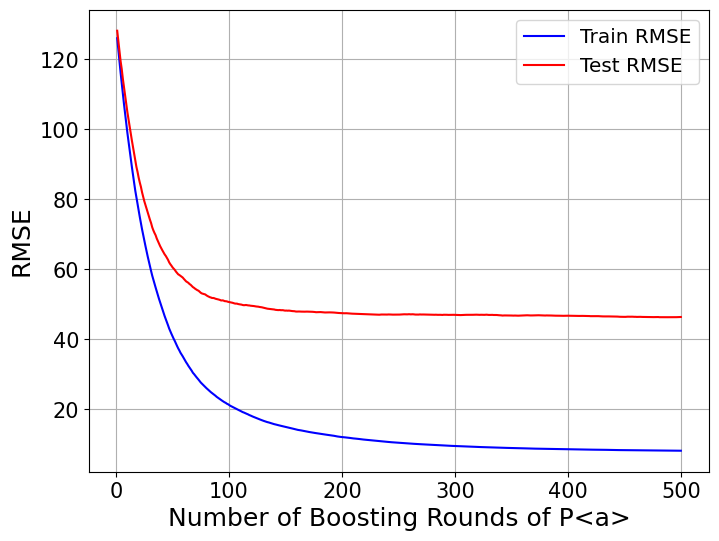

In [51]:
# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_result) + 1), cv_result['train-rmse-mean'], c="blue", label='Train RMSE')
plt.plot(range(1, len(cv_result) + 1), cv_result['test-rmse-mean'], c="red", label='Test RMSE')
plt.xlabel('Number of Boosting Rounds of P<a>', fontsize=18)
plt.ylabel('RMSE', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize="x-large")
plt.savefig(r'D:\Desktop\Researchs\CRSS of Ti\Training results\XGBoost Learning Curve of secondary Pa.png', dpi=300, bbox_inches='tight')
plt.show()

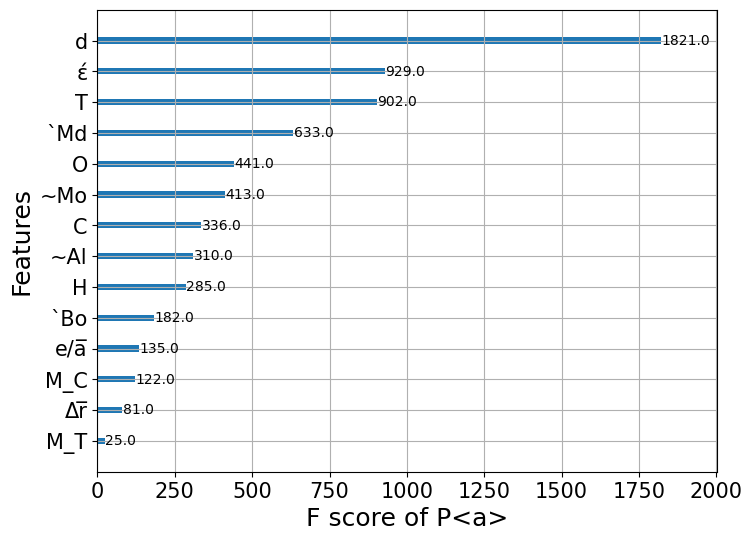

In [52]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(8, 6))
plot_importance(xgb_model, ax=ax)
plt.xlabel('F score of P<a>', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('')
plt.savefig(r'D:\Desktop\Researchs\CRSS of Ti\Training results\Feature importance of secondary Pa.png', dpi=300, bbox_inches='tight')
plt.show()